<a href="https://www.kaggle.com/code/mikedelong/eda-using-python?scriptVersionId=139827496" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from numpy import nan
import pandas as pd

def clean_households(arg):
    if isinstance(arg, str):
        if arg.isnumeric():
            return float(arg)
        else:
            return nan
    return arg

df = pd.read_csv(filepath_or_buffer='/kaggle/input/housingdata/housing2 (1).csv')
df['households'] = df['households'].apply(func=clean_households)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138.0,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219.0,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259.0,3.8462,342200,NEAR BAY,male


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          16255 non-null  float64
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


<Axes: ylabel='Frequency'>

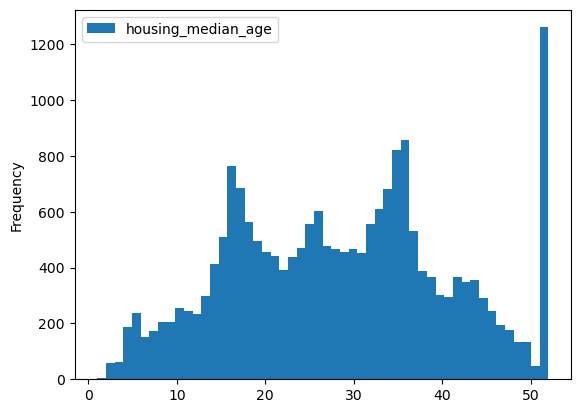

In [3]:
df[['housing_median_age']].plot.hist(bins=52)

That's an odd-looking distribution, with three modes; that rightmost mode looks especially odd. Guessing the units are years here; and the rightmost bin must be the older-than bin.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='longitude', ylabel='latitude'>

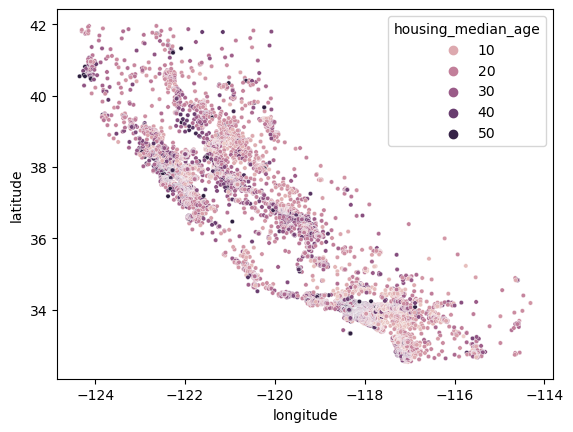

In [4]:
from seaborn import scatterplot
scatterplot(data=df, x='longitude', y='latitude', hue='housing_median_age', s=10)

No clue what the total rooms signify, but the cluster so tightly and the outliers are so far from the mean we use a log plot.

<Axes: ylabel='Frequency'>

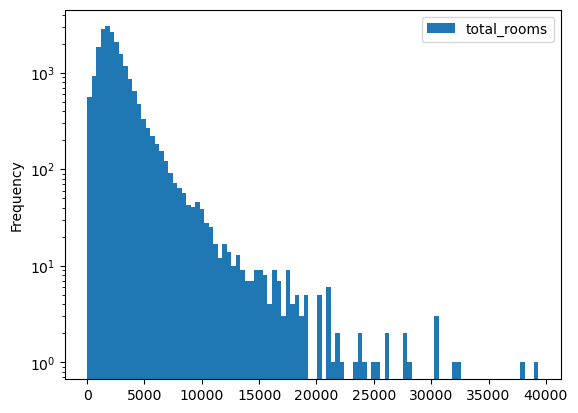

In [5]:
df[['total_rooms']].plot.hist(bins=100, log=True)

<Axes: xlabel='longitude', ylabel='latitude'>

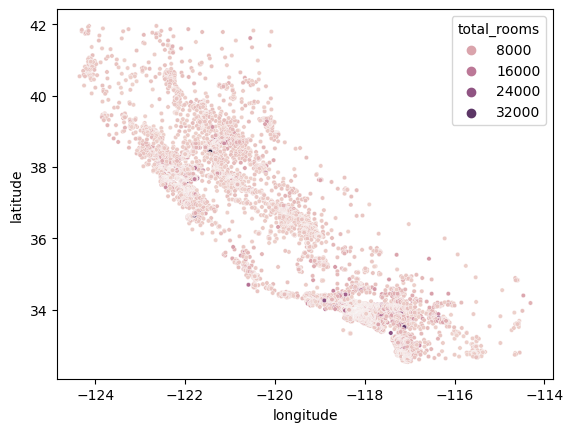

In [6]:
scatterplot(data=df, x='longitude', y='latitude', hue='total_rooms', s=10)

<Axes: ylabel='Frequency'>

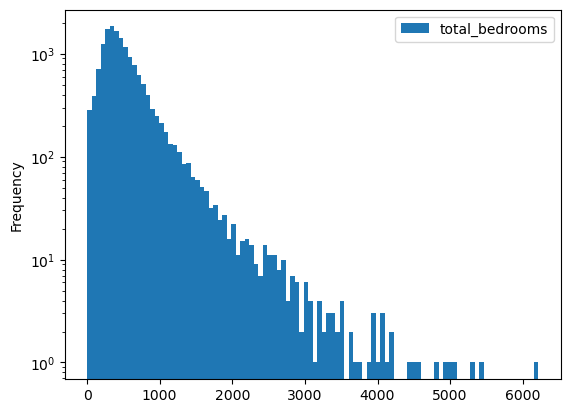

In [7]:
df[['total_bedrooms']].plot.hist(bins=100, log=True)

<Axes: xlabel='longitude', ylabel='latitude'>

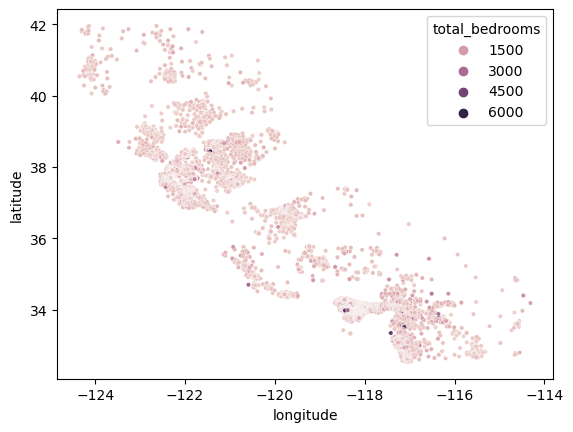

In [8]:
scatterplot(data=df, x='longitude', y='latitude', hue='total_bedrooms', s=10)

In [9]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<Axes: xlabel='longitude', ylabel='latitude'>

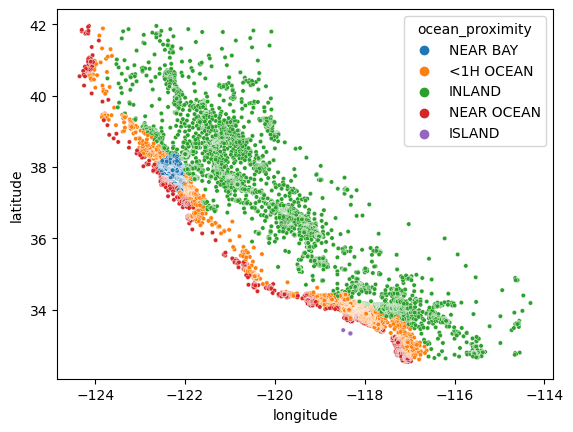

In [10]:
scatterplot(data=df, x='longitude', y='latitude', hue='ocean_proximity', s=10)

In [11]:
df['gender'].value_counts()

female    8673
male      7947
Name: gender, dtype: int64

<Axes: xlabel='longitude', ylabel='latitude'>

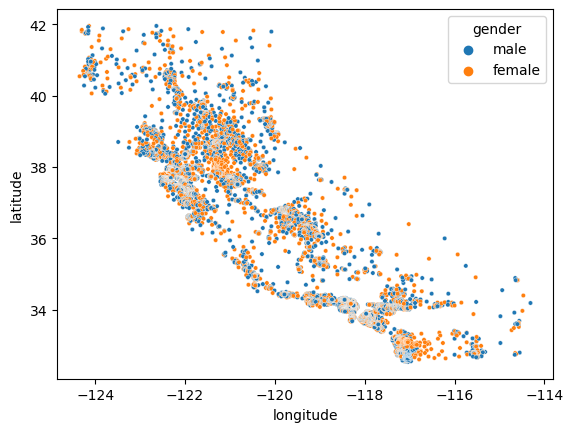

In [12]:
from seaborn import scatterplot
scatterplot(data=df, x='longitude', y='latitude', hue='gender', s=10)

<Axes: >

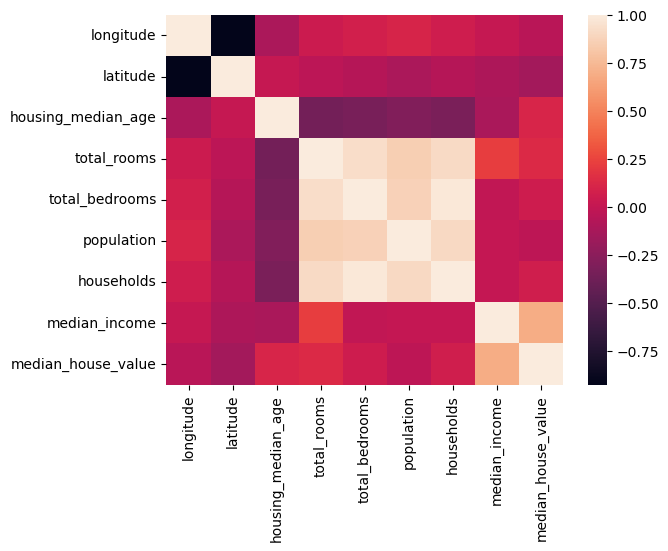

In [13]:
from seaborn import heatmap
heatmap(data=df.corr(numeric_only=True))

The correlations here are high enough that we would expect to be able to build a pretty simple linear model that predicts price pretty well.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


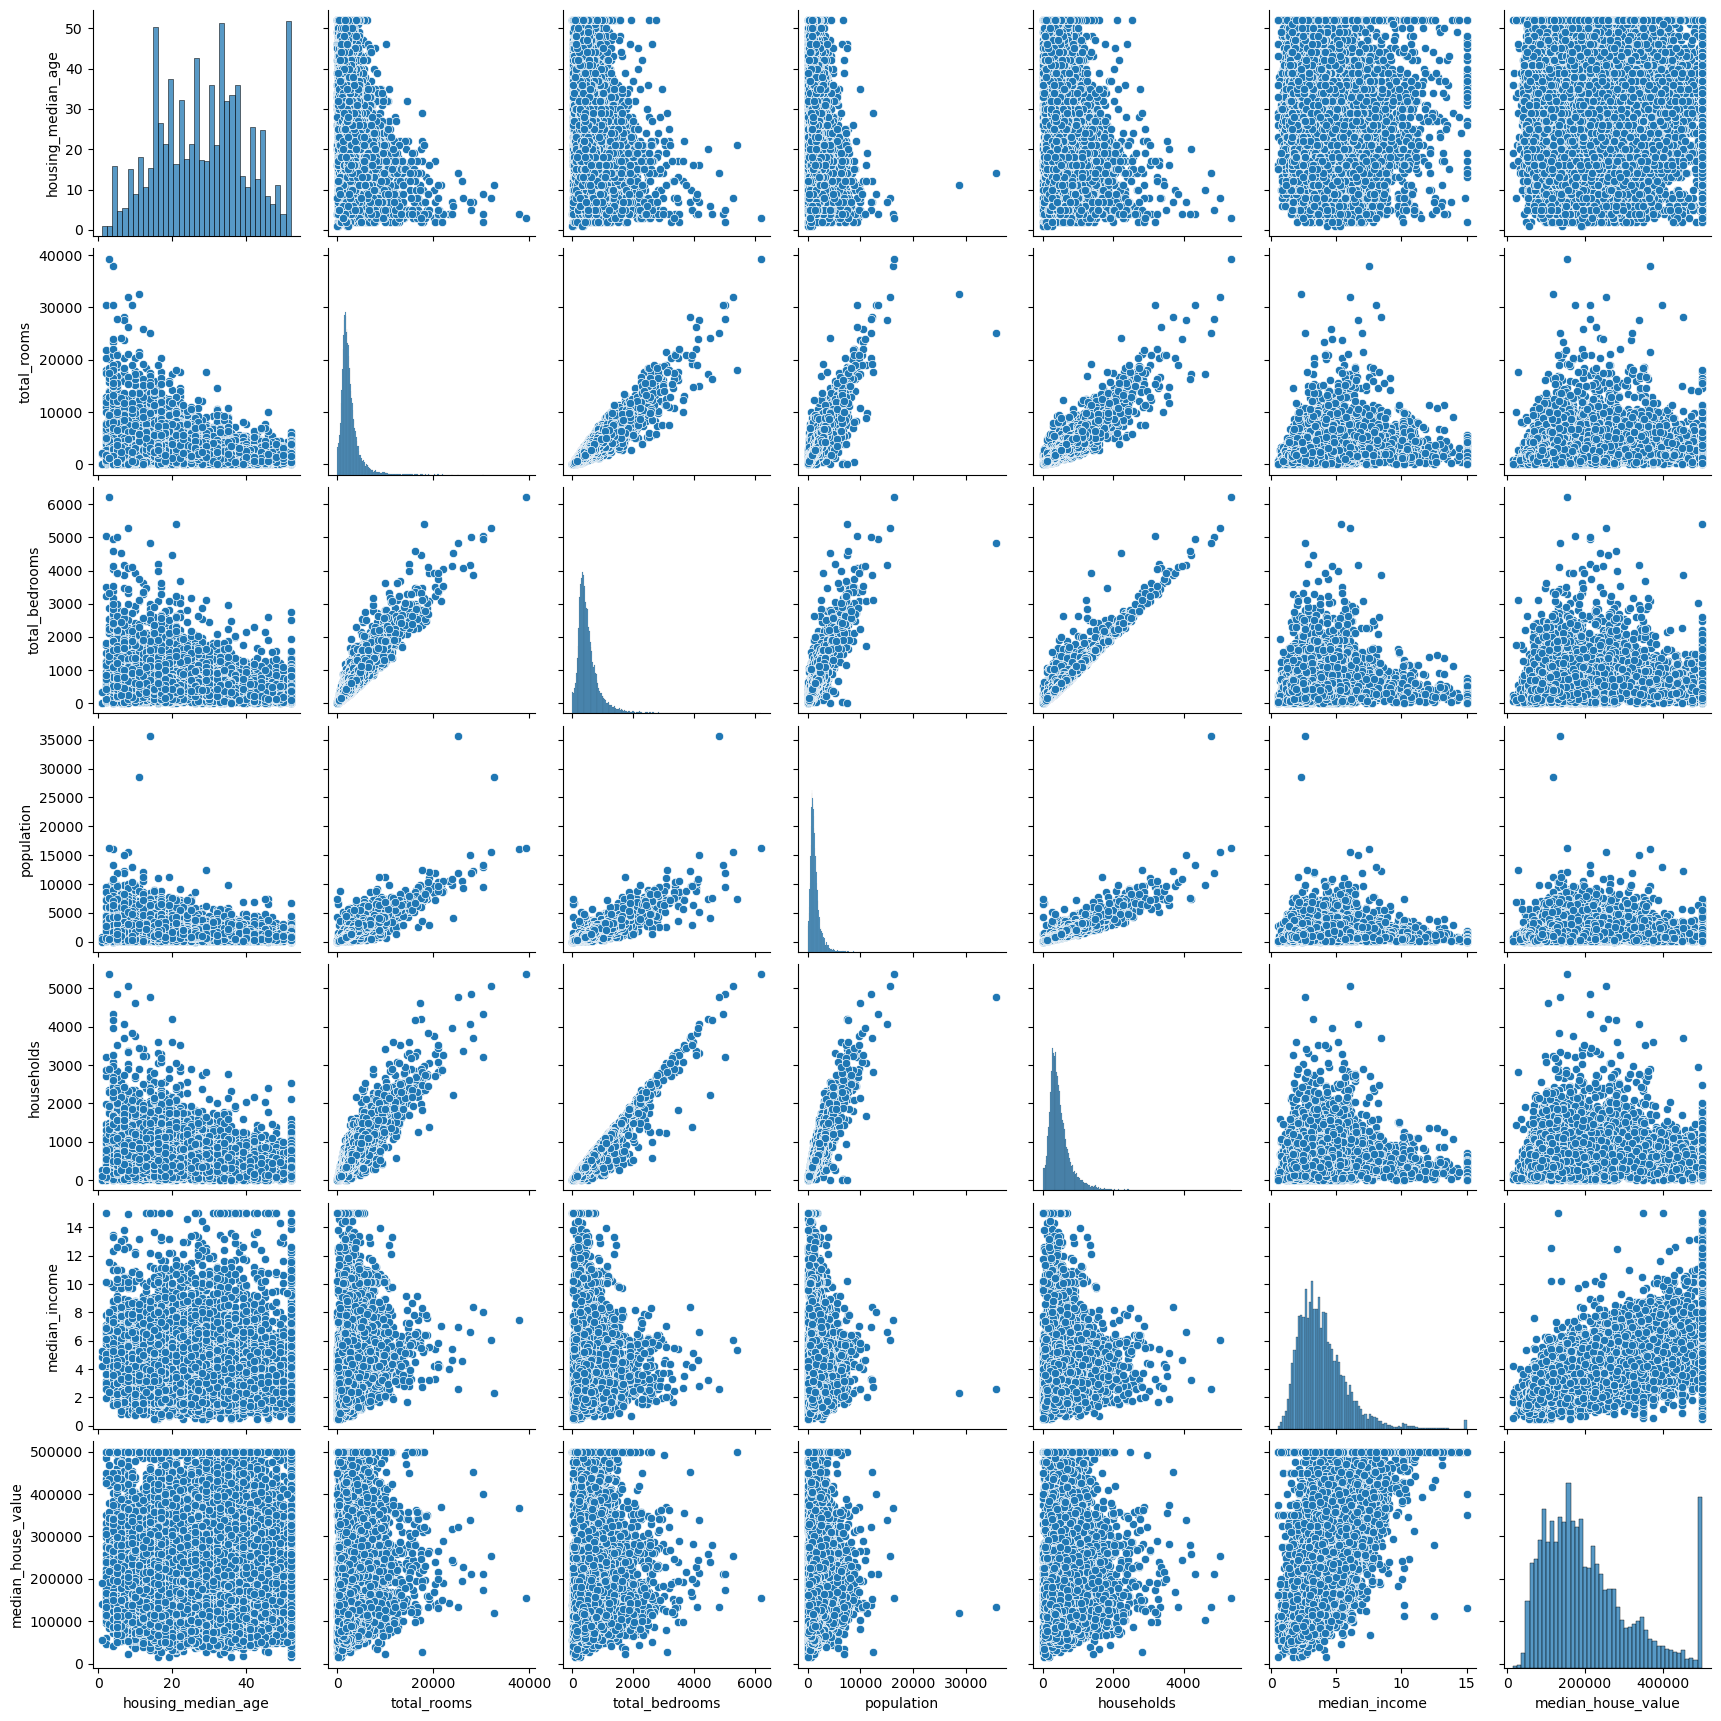

In [14]:
from seaborn import pairplot
pairplot(data=df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','median_house_value', ]])